In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('drive/MyDrive/titanic.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data.isnull().sum()
data.drop('Cabin', axis=1, inplace=False) #Drop Cabin Column

median_age = data['Age'].median()
median_age_no_missing = data['Age'].fillna(0).median() #Replace missing ages with median

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0]) #Replacing missing values with the most popular

data['Sex'].fillna(data['Sex'].mode()[0], inplace=True)

# Check for missing values in the 'Fare' column
data['Fare'].isnull().sum()

<ipython-input-6-00067cc0e59e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].fillna(data['Sex'].mode()[0], inplace=True)


0

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



# Drop columns we dont need
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])

# Missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)


X = data.drop(columns=['Survived'])  # Drop target column Survived
y = data['Survived']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.79


<ipython-input-7-4553ba5e00b3>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-7-4553ba5e00b3>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[93 12]
 [18 56]]


In [11]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

# Get the best model and predict
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
print(f'Accuracy of best model: {accuracy_score(y_test, y_pred):.2f}')


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
463 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best Parameters: {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.83
Accuracy of best model: 0.82


In [24]:
best_rf = grid_search.best_estimator_

# Retrain
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [26]:
# Random Forest with the best parameters
rf = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)


y_pred = best_rf.predict(X_test)




print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
[[96  9]
 [24 50]]


In [14]:
#Make variable for family size

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

#data['Title_FamilySize'] = data['Title'] + '_' + data['FamilySize'].astype(str)

In [15]:
#Making bins for ages

bins = [0, 12, 18, 30, 40, 50, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior', 'Elderly']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

data['IsChild'] = (data['Age'] < 18).astype(int)

In [16]:
#Bins for Fare

bins = [0, 10, 50, 100, 200, 500, 1000]
labels = ['Low', 'Medium', 'High', 'Very High', 'Luxury', 'VIP']
data['FareGroup'] = pd.cut(data['Fare'], bins=bins, labels=labels)

data['HighFare'] = (data['Fare'] > 100).astype(int)

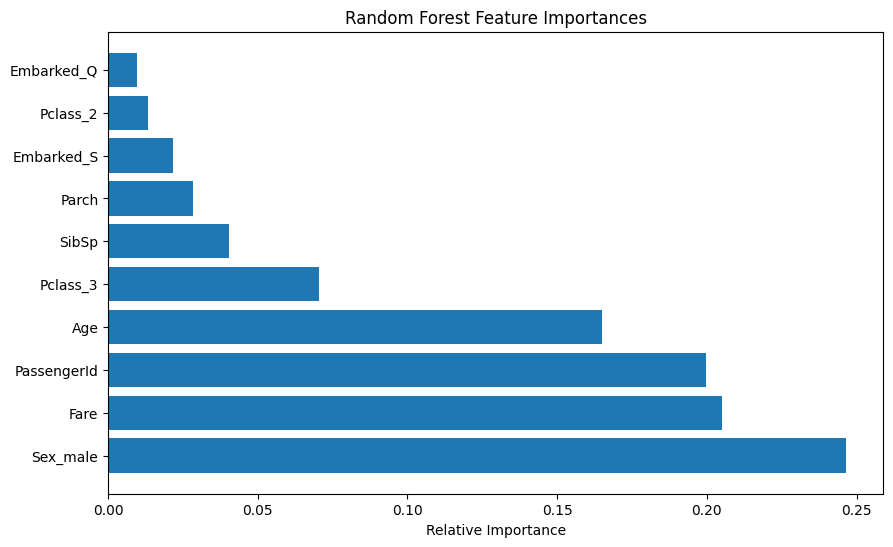

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)


y_pred = gb.predict(X_test)


print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.82


It is surprising that the Random Forest had a higher accuracy than the Gradient Boost.

In [19]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f'Cross-validated Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Cross-validated Accuracy: 0.81 ± 0.05
